In [3]:
import io
import os
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping



Using TensorFlow backend.


In [2]:
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'"sepal_l","sepal_w","petal_l","petal_w","species"\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3.0,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5.0,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5.0,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3.0,1.4,0.1,Iris-setosa\r\n4.3,3.0,1.1,0.1,Iris-setosa\r\n5.8,4.0,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1.0,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5.0,3.0,1.6,0.2,Iris-setosa\r\n5.0,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.

In [0]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#codificando los valores de texto para indices
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [0]:
species = encode_text_index(df,'species')

In [15]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
#separando datos de entrenamiento y teste
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    
    # Descobre o tipo da coluna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encoding para int. TensorFlow gosta de 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificação
        dummies = pd.get_dummies(df[target])
        return df.values.astype('float32'), dummies.values.astype('float32')
    else:
        # Regressão
        return df.values.astype('float32'), df[target].astype('float32')

In [0]:
x,y = to_xy(df,'species')

In [0]:
#dividiendo en entrenamiento y teste
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

#Red de clasificación

In [0]:
#construyendoel modelo
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1],kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 6         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [0]:
#eralystoping
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')

In [0]:
#entrenando el modelo
model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor], verbose=2,epochs=1000)

##Evaluando los resultados de clasificación

Accuracy = numero de registros donde la NN acerto correctamente a la clase objetivo

$ accuracy = \frac{\textit{#} \ correct}{N} $

In [28]:
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 22)
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_compare = np.argmax(y_test, axis = 1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy: {}".format(score))

Accuracy: 1.0


In [29]:
from IPython.display import display

# No muestra la notación cientifica
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generar predicciones
pred = model.predict(x_test)

print("Array Numpy de Predicciones")
print(pred[0]*100)

print("Porcentajes de probabilidades")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Array Numpy de Predicciones
[99.5745  0.4255  0.    ]
Porcentajes de probabilidades


array([[0.9957, 0.0043, 0.    ],
       [0.    , 0.008 , 0.9919],
       [0.0994, 0.8417, 0.0589],
       [0.    , 0.0064, 0.9936],
       [0.0934, 0.8408, 0.0658]], dtype=float32)

Log loss score: 0.07464335583564308


#Red de regresión

In [30]:
from google.colab import files
files.upload()

Saving auto-mpg.csv to auto-mpg.csv


{'auto-mpg.csv': b"mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name\r\n18,8,307,130,3504,12,70,1,chevrolet chevelle malibu\r\n15,8,350,165,3693,11.5,70,1,buick skylark 320\r\n18,8,318,150,3436,11,70,1,plymouth satellite\r\n16,8,304,150,3433,12,70,1,amc rebel sst\r\n17,8,302,140,3449,10.5,70,1,ford torino\r\n15,8,429,198,4341,10,70,1,ford galaxie 500\r\n14,8,454,220,4354,9,70,1,chevrolet impala\r\n14,8,440,215,4312,8.5,70,1,plymouth fury iii\r\n14,8,455,225,4425,10,70,1,pontiac catalina\r\n15,8,390,190,3850,8.5,70,1,amc ambassador dpl\r\n15,8,383,170,3563,10,70,1,dodge challenger se\r\n14,8,340,160,3609,8,70,1,plymouth 'cuda 340\r\n15,8,400,150,3761,9.5,70,1,chevrolet monte carlo\r\n14,8,455,225,3086,10,70,1,buick estate wagon (sw)\r\n24,4,113,95,2372,15,70,3,toyota corona mark ii\r\n22,6,198,95,2833,15.5,70,1,plymouth duster\r\n18,6,199,97,2774,15.5,70,1,amc hornet\r\n21,6,200,85,2587,16,70,1,ford maverick\r\n27,4,97,88,2130,14.5,70,3,datsun pl510\r\n26,4,97,4

In [0]:
df = pd.read_csv('auto-mpg.csv',na_values=['NA','?'])

In [35]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [0]:
#limpieza y transformación de datos
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")

In [39]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

In [41]:
model = Sequential()
model.add(Dense(10, input_dim = x.shape[1], kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
model.fit(x, y, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

Train on 398 samples, validate on 100 samples
Epoch 1/1000
 - 0s - loss: 1799.3714 - val_loss: 1094.8183
Epoch 2/1000
 - 0s - loss: 787.6379 - val_loss: 433.1736
Epoch 3/1000
 - 0s - loss: 322.6210 - val_loss: 173.5058
Epoch 4/1000
 - 0s - loss: 179.5694 - val_loss: 140.7854
Epoch 5/1000
 - 0s - loss: 175.4384 - val_loss: 143.1719
Epoch 6/1000
 - 0s - loss: 172.2347 - val_loss: 136.5682
Epoch 7/1000
 - 0s - loss: 166.9424 - val_loss: 134.5724
Epoch 8/1000
 - 0s - loss: 165.1437 - val_loss: 132.7390
Epoch 9/1000
 - 0s - loss: 162.9480 - val_loss: 130.9253
Epoch 10/1000
 - 0s - loss: 160.8159 - val_loss: 129.0940
Epoch 11/1000
 - 0s - loss: 158.6493 - val_loss: 127.2600
Epoch 12/1000
 - 0s - loss: 156.1989 - val_loss: 125.1787
Epoch 13/1000
 - 0s - loss: 153.7075 - val_loss: 123.0760
Epoch 14/1000
 - 0s - loss: 151.6194 - val_loss: 120.9043
Epoch 15/1000
 - 0s - loss: 148.5957 - val_loss: 118.7078
Epoch 16/1000
 - 0s - loss: 146.0667 - val_loss: 116.4389
Epoch 17/1000
 - 0s - loss: 143.3

##Mean Square Error y Root Mean Square Error
$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $


$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [42]:
# Predicciones
pred = model.predict(x_test)

# Midiendo el MSE
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 2.62872314453125


In [43]:
#midiendo el RMSE
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.6213337182998657


#Entrenamiento con cross validation
La validación cruzada usa varios modelos para generar predicciones de registros en todo el conjunto de datos

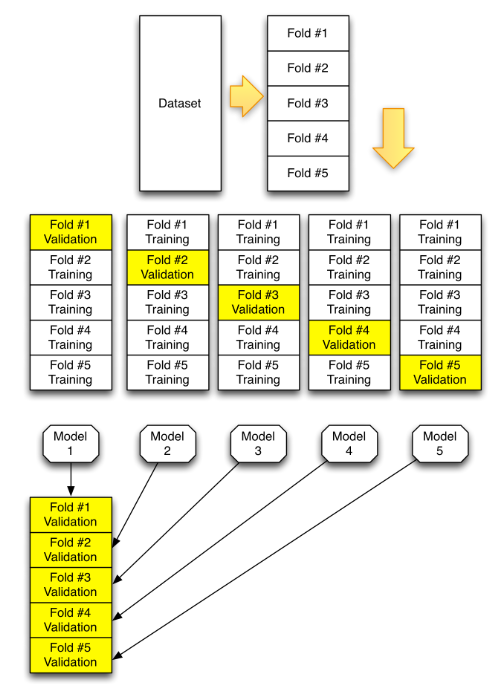

In [46]:
from IPython.display import Image
Image(filename='CV.PNG')

In [0]:
df = pd.read_csv('auto-mpg.csv', na_values=['NA','?'])
write_df = 'auto-mpg-salida.csv'

In [0]:
#mezclando los datos
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True,drop=True)

In [0]:
#preproceso
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')

# Encode para una matriz 2D 
x,y = to_xy(df,'mpg')

In [50]:
#Crosvalidation
from scipy.stats import zscore
from sklearn.model_selection import KFold

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

# Entrenamiento
for train, test in kf.split(x):
    fold += 1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
    model.fit(x_train, y_train,validation_data = (x_test,y_test), callbacks = [monitor], verbose = 0, epochs = 1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)        

    # Midiendo el RMSE por Fold
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("Fold score (RMSE): {}".format(score))

Fold #1
Epoch 00147: early stopping
Fold score (RMSE): 2.93414568901062
Fold #2
Epoch 00249: early stopping
Fold score (RMSE): 2.5303118228912354
Fold #3
Epoch 00228: early stopping
Fold score (RMSE): 2.59059476852417
Fold #4
Epoch 00049: early stopping
Fold score (RMSE): 6.421060085296631
Fold #5
Epoch 00209: early stopping
Fold score (RMSE): 1.724068284034729


In [51]:
# Crea l lista de predicciones y calcula el error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final Score (RMSE): {}".format(score))    
    
# Graba las predicciones
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
oosDF.to_csv(write_df, index=False)

Final Score (RMSE): 3.624948740005493
